In [1]:
import pandas as pd
import matplotlib.pyplot as pt
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [2]:
x_value=data.loc[:,'X':'rain']
x_values=x_value.drop(['month','day'],axis='columns')
x_values

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [3]:
y_values=data.loc[:,'area']

In [4]:
y_values

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
x_values.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
stand=StandardScaler()
x_stand=stand.fit_transform(x_values)

In [9]:
features=pd.DataFrame(x_stand,columns=x_values.columns)

In [10]:
features

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.008313,0.569860,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,1.008313,-0.244001,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,1.008313,-0.244001,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,1.440925,1.383722,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,1.440925,1.383722,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268
...,...,...,...,...,...,...,...,...,...,...
512,-0.289524,-1.057862,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268
513,-1.154748,-0.244001,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268
514,1.008313,-0.244001,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268
515,-1.587360,-0.244001,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268


In [11]:
dataset=pd.concat([features,y_values],axis='columns')
features.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,2.113074e-16,2.611279e-16,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.587360e+00,-1.871724e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02
25%,-7.221360e-01,-2.440010e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02
50%,-2.895238e-01,-2.440010e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02
75%,1.008313e+00,5.698604e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02
max,1.873537e+00,3.825306e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01


In [12]:
dataset

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,0.569860,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.00
1,1.008313,-0.244001,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0.00
2,1.008313,-0.244001,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0.00
3,1.440925,1.383722,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0.00
4,1.440925,1.383722,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,-0.289524,-1.057862,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,6.44
513,-1.154748,-0.244001,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,54.29
514,1.008313,-0.244001,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,11.16
515,-1.587360,-0.244001,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,0.00


In [13]:
corr_data=dataset.corr()
corr_data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


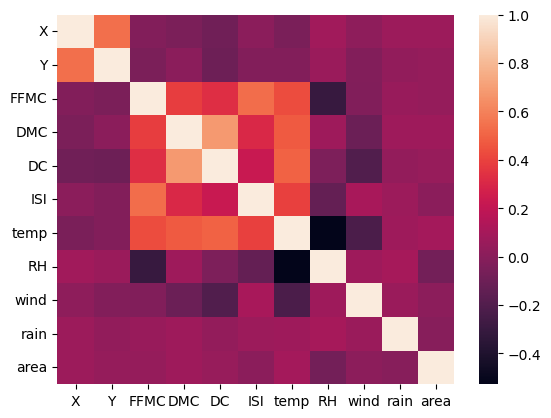

In [14]:
import seaborn as sb
sb.heatmap(corr_data)
pt.show()

In [15]:
y_values.describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

<Axes: >

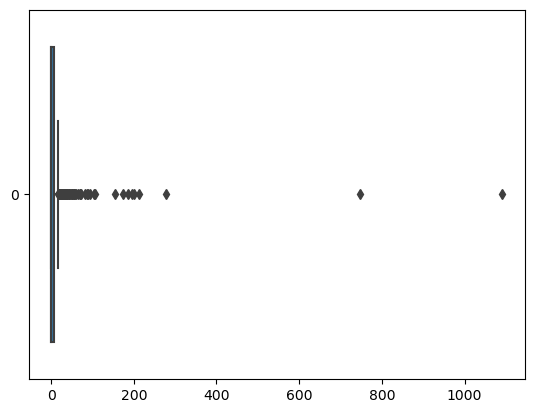

In [16]:
#y values are not normal distributed ie.symmentic
#it is asymmentic distribution and is positive dristribution ie positively skewed
sb.boxplot(y_values,orient='h')

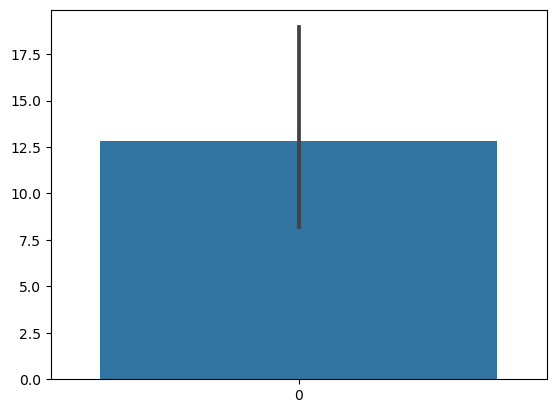

In [17]:
sb.barplot(y_values)
pt.show()

In [18]:
import numpy as py
output=py.log(y_values+1)

In [19]:
output

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

<Axes: >

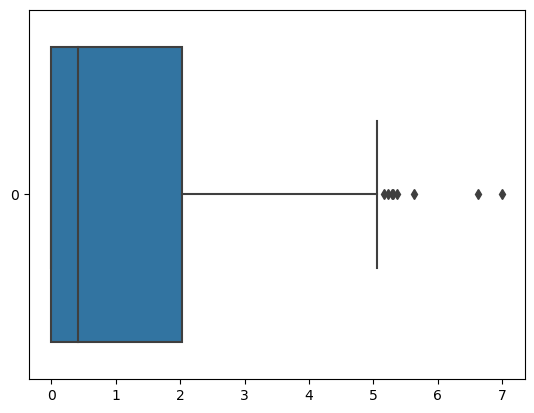

In [20]:
sb.boxplot(output,orient='h')

In [21]:
out=py.sqrt(output)
out

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    1.416641
513    2.003146
514    1.580554
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

<Axes: >

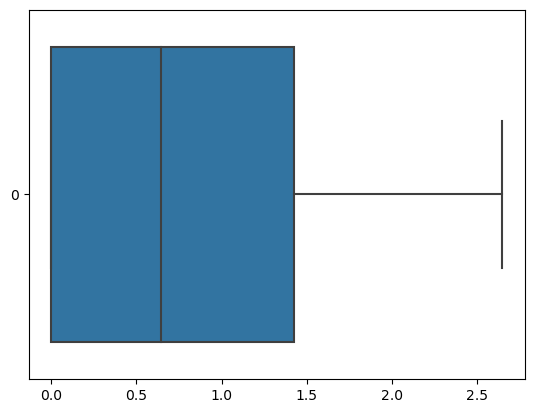

In [22]:
sb.boxplot(out,orient='h')

In [23]:
features

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.008313,0.569860,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,1.008313,-0.244001,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,1.008313,-0.244001,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,1.440925,1.383722,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,1.440925,1.383722,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268
...,...,...,...,...,...,...,...,...,...,...
512,-0.289524,-1.057862,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268
513,-1.154748,-0.244001,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268
514,1.008313,-0.244001,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268
515,-1.587360,-0.244001,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268


In [24]:
features.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,2.113074e-16,2.611279e-16,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.587360e+00,-1.871724e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02
25%,-7.221360e-01,-2.440010e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02
50%,-2.895238e-01,-2.440010e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02
75%,1.008313e+00,5.698604e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02
max,1.873537e+00,3.825306e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01


In [25]:
out.describe()

count    517.000000
mean       0.727073
std        0.763884
min        0.000000
25%        0.000000
50%        0.647078
75%        1.422741
max        2.644923
Name: area, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
key_dataset=pd.concat([features,out],axis='columns')
key_dataset

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,0.569860,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.000000
1,1.008313,-0.244001,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0.000000
2,1.008313,-0.244001,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0.000000
3,1.440925,1.383722,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0.000000
4,1.440925,1.383722,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
512,-0.289524,-1.057862,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,1.416641
513,-1.154748,-0.244001,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,2.003146
514,1.008313,-0.244001,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,1.580554
515,-1.587360,-0.244001,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,0.000000


In [27]:
x_train,x_test,y_train,y_test=train_test_split(features,out,test_size=0.2,random_state=32)

In [28]:
x_train

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
475,-1.154748,0.569860,0.554025,0.169223,-0.797898,1.971066,0.656926,-0.263053,3.007063,-0.073268
289,1.008313,-0.244001,0.173229,-0.104281,-0.294723,-0.004756,0.932740,-0.876486,-1.238940,-0.073268
317,-0.289524,-0.244001,0.318294,-0.229311,0.772557,-0.092570,0.053582,-1.244547,0.492982,-0.073268
170,0.143088,-0.244001,0.408960,0.350517,0.611961,0.039151,0.519019,-0.569770,-1.238940,-0.073268
357,0.575701,-1.057862,0.336427,0.173912,0.975522,0.258687,-0.515284,0.657098,-0.233308,-0.073268
...,...,...,...,...,...,...,...,...,...,...
71,-0.289524,0.569860,0.662824,-0.402790,0.582505,1.510041,-0.204993,-0.447083,-0.233308,-0.073268
252,0.575701,0.569860,0.445226,0.725608,0.479207,0.983155,0.553496,-0.447083,-0.233308,-0.073268
403,1.440925,1.383722,0.010031,1.300747,0.383575,-0.487735,0.415588,-0.201709,-0.233308,-0.073268
88,-1.587360,-1.871724,0.517759,0.600578,0.728979,-0.202338,1.105124,-0.508426,-0.233308,-0.073268


In [29]:
x_test

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
440,0.143088,-0.244001,-0.062501,2.799547,1.240224,-0.356013,-0.463569,0.841128,-0.233308,-0.073268
144,-1.154748,0.569860,0.880421,-0.171484,-0.139776,0.917295,0.846548,-0.753800,0.772325,-0.073268
320,0.575701,-1.057862,0.390827,0.127025,0.950505,-0.334060,0.001867,-0.631113,1.777957,-0.073268
111,-0.722136,-0.244001,0.191362,-1.212361,-1.898266,-0.004756,-0.015371,-1.612607,0.269509,-0.073268
370,1.008313,-0.244001,0.064430,2.585433,1.118364,-0.421874,-0.877290,2.006652,2.001430,-0.073268
...,...,...,...,...,...,...,...,...,...,...
79,-1.587360,-1.871724,0.064430,0.161409,0.055119,-0.443828,0.467304,-1.551263,1.498614,-0.073268
12,0.575701,0.569860,-4.922179,-0.626282,0.473558,-1.804950,-0.325662,1.699935,1.498614,-0.073268
146,0.143088,-0.244001,-0.098768,-1.112337,-1.861547,-0.619456,-0.980721,-0.263053,0.772325,-0.073268
371,-0.722136,-0.244001,0.227629,0.355206,-0.110723,-0.224292,-0.808337,0.841128,-0.009834,-0.073268


In [30]:
y_train

475    1.196955
289    0.000000
317    1.250776
170    1.128080
357    0.000000
         ...   
71     0.000000
252    0.436601
403    0.000000
88     0.000000
310    0.000000
Name: area, Length: 413, dtype: float64

In [31]:
y_test

440    0.000000
144    0.755632
320    1.888275
111    0.000000
370    1.577940
         ...   
79     0.000000
12     0.000000
146    0.817208
371    0.000000
457    2.104242
Name: area, Length: 104, dtype: float64

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
knn_model=KNeighborsRegressor(1)

In [34]:
knn_model

KNeighborsRegressor(n_neighbors=1)

In [35]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [36]:
y_train_predict=knn_model.predict(x_train)

In [37]:
from sklearn.metrics import mean_squared_error,r2_score

In [38]:
mean_error=mean_squared_error(y_train,y_train_predict)
r2_error=r2_score(y_train,y_train_predict)

In [39]:
print('model 1 pre')
print("mean squared error",mean_error)
print('r square error',r2_error)

model 1 pre
mean squared error 0.0038305614170421817
r square error 0.9934829039014678


In [40]:
key_dataset.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.061883
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.048208
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.056406
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.064133
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.078805
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.002008
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.054325
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.044152
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.069404
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,0.029304


In [41]:
x_train.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,-0.008797,-0.005557,-0.004941,-0.026602,-0.003790,-0.004224,0.011801,-0.003272,-0.019709,-0.043787
std,1.007397,1.006044,1.017901,0.970388,1.002312,0.901250,1.006075,1.001074,1.007401,0.318276
min,-1.587360,-1.871724,-13.045818,-1.715608,-2.179108,-1.980578,-2.876943,-1.796637,-2.021098,-0.073268
25%,-0.722136,-0.244001,-0.080635,-0.777881,-0.394390,-0.575549,-0.584238,-0.692456,-0.736124,-0.073268
50%,-0.289524,-0.244001,0.173229,-0.040203,0.444908,-0.136477,0.053582,-0.140366,-0.009834,-0.073268
75%,1.008313,0.569860,0.390827,0.475547,0.653522,0.434316,0.691403,0.534411,0.492982,-0.073268
max,1.873537,3.825306,1.007353,2.819865,1.261610,3.002885,2.449718,3.417549,3.007063,4.661696


In [42]:
y_train_predict_sq=py.power(y_train_predict,2)
y_predict_post=py.exp(y_train_predict_sq)
y_train_sq=py.power(y_train,2)
y_train_post=py.exp(y_train_sq)

In [43]:
mean_error=mean_squared_error(y_predict_post,y_train_post)
r2_error=r2_score(y_predict_post,y_train_post)
print('model 1 post')
print("mean squared error",mean_error)
print('r square error',r2_error)

model 1 post
mean squared error 0.4448631961259082
r square error 0.9999093799567054


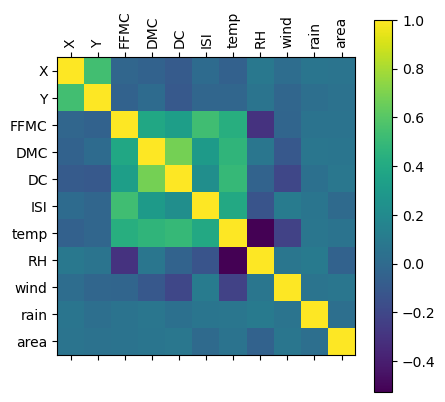

In [44]:
pt.matshow(key_dataset.corr())
pt.xticks(list(range(0,len(key_dataset.columns))),key_dataset.columns,rotation=90)
pt.yticks(list(range(0,len(key_dataset.columns))),key_dataset.columns)
pt.colorbar()

In [47]:
k_value=list(range(1,10))
knn_model=KNeighborsRegressor()
r2,mean_2=[],[]
for x in k_value:
    knn_model.set_params(n_neighbors=x)
    knn_model.fit(x_train,y_train)
    curr=knn_model.predict(x_train)
    m=mean_squared_error(y_train,curr)
    r=r2_score(y_train,curr)
    r2.append(r)
    mean_2.append(m)

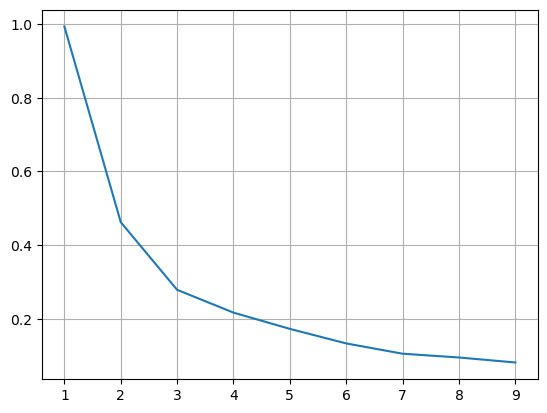

In [48]:
pt.grid()
pt.plot(k_value,r2)
pt.show()

In [49]:
test_predict=knn_model.predict(x_test)

In [ ]:
mean_error=mean_squared_error(,y_train_post)
r2_error=r2_score(y_predict_post,y_train_post)
print('model 2 post')
print("mean squared error",mean_error)
print('r square error',r2_error)